### AIM: Support Vector Machines

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from sklearn.metrics import recall_score, precision_score, classification_report,accuracy_score,confusion_matrix, roc_curve, auc, roc_curve,accuracy_score,ConfusionMatrixDisplay


/tmp/ipykernel_38762/1437453873.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
df = pd.read_csv('results.csv')
df = df.drop('Unnamed: 0', axis=1)

x = df[df.columns[df.columns != 'habitable']] # whole dataset
x = x.drop(['lon','lat', 'angsep', 'maxangsep', 'hz_in', 'hz_out', 'hz_center', 'snr_1h', 'baseline', 'detected', 'snr_current','id', 'int_time', 't_slew', 'ra', 'dec'], axis=1)

x1 = np.array(df['sep_p'])
x2 = np.array(df['mass_s'])
X = np.transpose((x1,x2)) # picking a subset
y = np.array(df['habitable'])

In [3]:
# plt.scatter(x1,x2, c=y);

In [4]:
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
#     if plot_support:
#         ax.scatter(model.support_vectors_[:, 0],
#                    model.support_vectors_[:, 1],
#                    s=300, linewidth=1, edgecolors='black',
#                    facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Implementing on the whole dataset

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size =0.25)

In [7]:
# Applied an RBF kernel SVM model on the data. 
# Classification improved further by applying a balanced weight correction.

clf = SVC(kernel='rbf', C=1e6,  class_weight='balanced')
clf.fit(x_train, y_train)

SVC(C=1000000.0, class_weight='balanced')

In [8]:
y_pred = clf.predict(x_test)
print('Test accuracy of SVM:%.2f' %(accuracy_score(y_test,y_pred)*100))

Test accuracy of SVM:95.29


Text(0.5, 1.0, 'CONFUSION MATRIX')

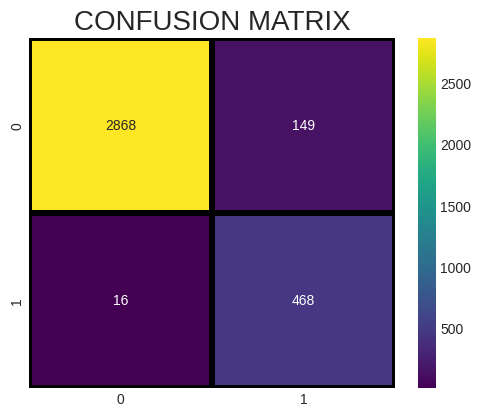

In [9]:
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

### Implementing on the subset

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state = 0, test_size =0.25)

In [11]:
# Applied an RBF kernel SVM model on the data with different tuning parameters C. 
# Classification improved further by applying a balanced weight correction.

for C in [100, 10, 5, 1, 0.1]:
    clf = SVC(kernel='rbf', C=C,  class_weight='balanced')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accu = accuracy_score(y_test,y_pred)*100
    print('C=%d: Accuracy = %.2f' %(C, accu))

C=100: Accuracy = 86.15
C=10: Accuracy = 84.92
C=5: Accuracy = 83.95
C=1: Accuracy = 78.72
C=0: Accuracy = 71.55


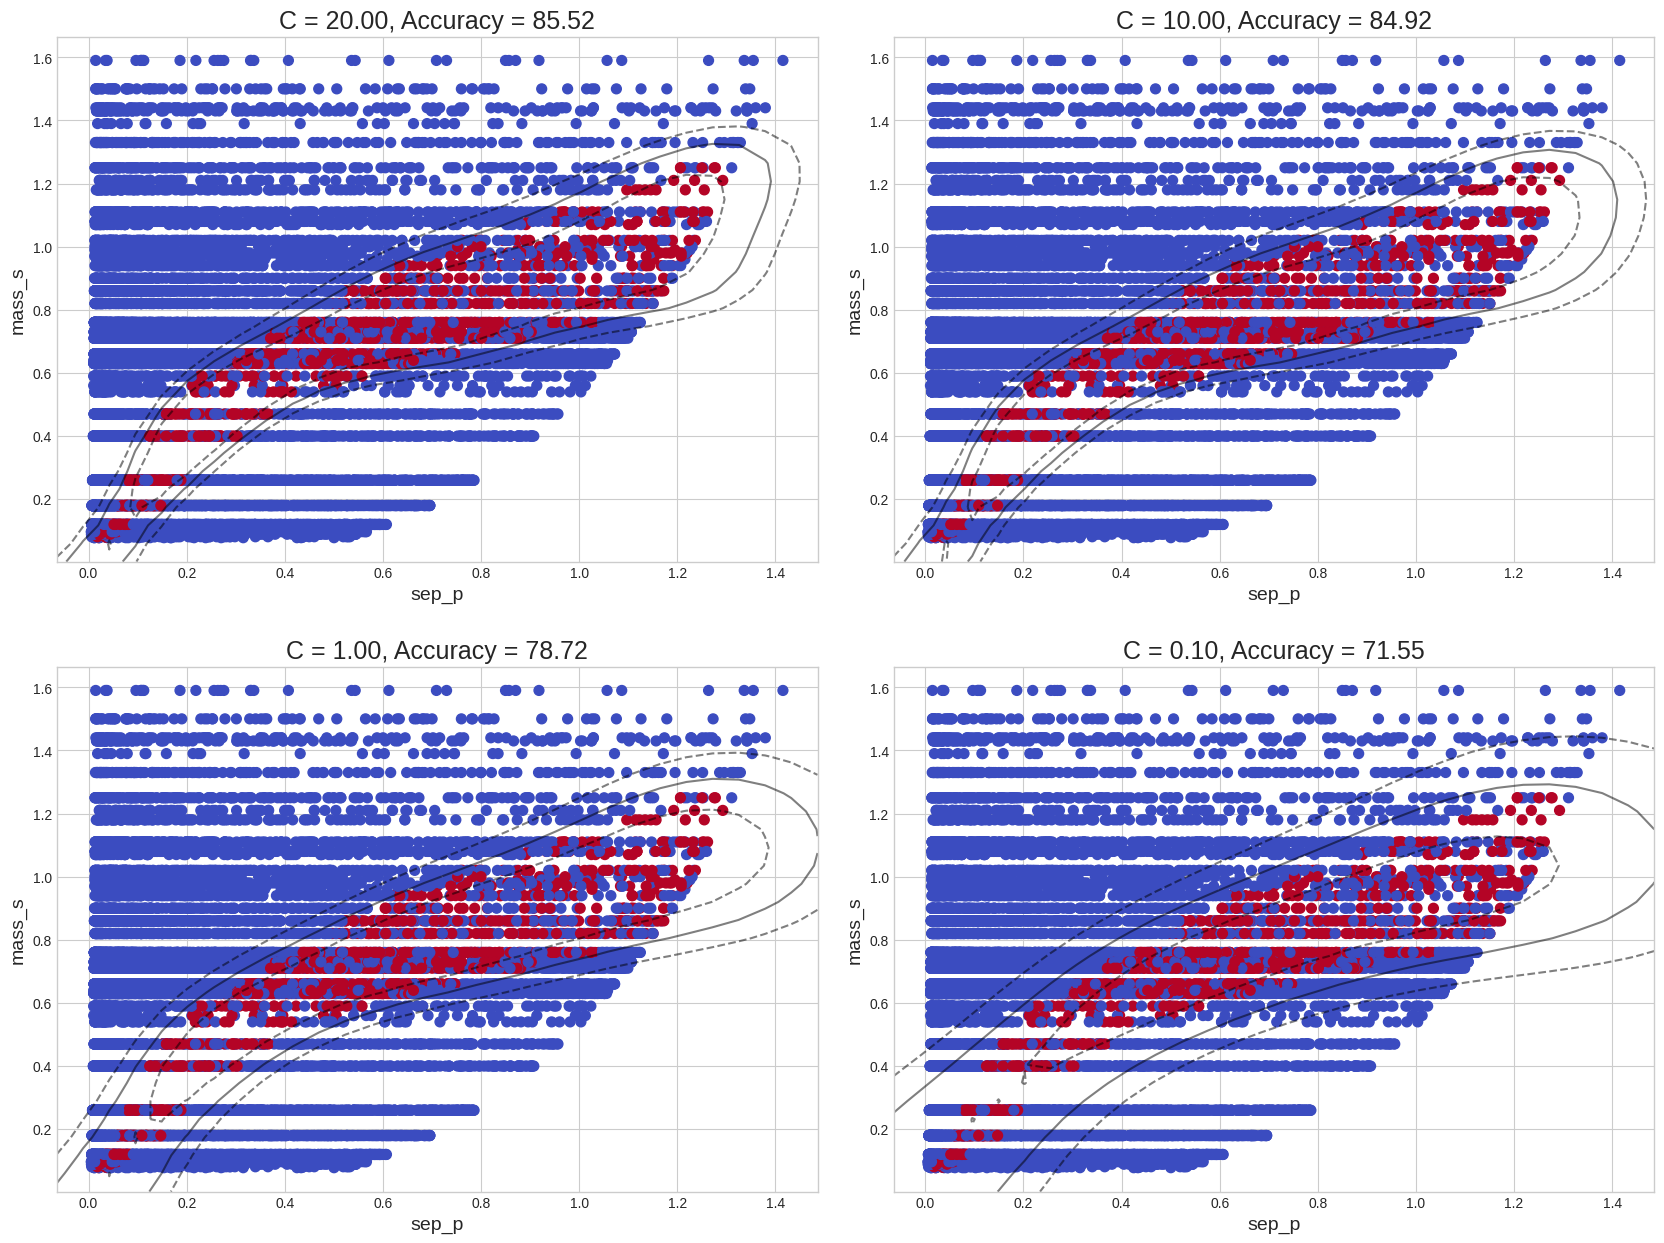

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(18,15))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, j, C in zip([0,0,1,1], [0,1,0,1], [20, 10, 1, 0.1]):
    model = SVC(kernel='rbf', C=C, class_weight='balanced').fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accu = accuracy_score(y_test,y_pred)*100
    ax[i,j].scatter(x1, x2, c=y, s=50, cmap='coolwarm')
    plot_svc_decision_function(model, ax[i,j])
    ax[i,j].scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=20, facecolors='none');
    ax[i,j].set_title('C = %.2f, Accuracy = %.2f' %(C, accu), size=18)
    ax[i,j].set_xlabel('sep_p', size=14)
    ax[i,j].set_ylabel('mass_s', size=14)    